In [ ]:
%matplotlib inline
import seaborn
import numpy as np, scipy, matplotlib.pyplot as plt, librosa, IPython.display as ipd
import numpy
import librosa, librosa.display
from IPython.lib.display import YouTubeVideo

[&larr; Back to Index](index.html)

# Fourier Transform

In a previous lecture, we explored the effects of adding musical notes on the resulting sound wave.  In this section, we will illustrate how you can decompose a sound wave back into the corresponding notes.  This process is known as the **Fourier transformation**, and is fundemental in many areas of mathematics.

## Motivating Example - Adding Pure Tones

In [ ]:
def make_pitch(f0, T = 2.0, sr = 22050):
    t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
    x = 0.1*numpy.sin(2*numpy.pi*f0*t)
    return (x, sr)

def make_wave_plots(*args, lower = 0, upper = 528, alpha = 0.2):
    """ Makes stacked wave plots for each of the arguments.
    
    args - an number of numpy array's from audio wav files."""
    n = len(args)
    fig = plt.figure(figsize=(15, n))
    for i, seq in enumerate(args):
        plt.subplot(n, 1, i + 1)
        librosa.display.waveplot(seq[lower:upper], sr, alpha=alpha)
    return fig

In [ ]:
a440, sr = make_pitch(440.0)
d294, sr = make_pitch(294.0)
mix = a440 + d294
f349, sr = make_pitch(349.0)
c523, sr = make_pitch(523.0)
mix2 = a440 + d294 + f349 + c523

In [ ]:
_ = make_wave_plots(mix, a440, d294)

In [ ]:
_ = make_wave_plots(mix2, a440, d294, f349, c523)

## Fourier Transform

The *Fourier Transform* ([Wikipedia](https://en.wikipedia.org/wiki/Fourier_transform)) is one of the most fundamental operations in applied mathematics and signal processing.

It transforms our time-domain signal into the *frequency domain*. Whereas the time domain expresses our signal as a sequence of samples, the frequency domain expresses our signal as a *superposition of sinusoids* of varying magnitudes, frequencies, and phase offsets.

## Nice Explanation

The following video gives a nice introduction to the Fourier transform.  Please watch the video first, as we will be reconstructing the work in Python below.

In [ ]:
yt_vid = "spUNpyF58BY"
from IPython.lib.display import YouTubeVideo
YouTubeVideo(yt_vid)

## Making a time vector

* Sampling rate is Hz = cycles/second = 22050
* Time_gap = 1/Hz = 1/22050
* Time(i) = i/22050

In [ ]:
time = numpy.linspace(0, len(a440)/sr, len(a440))
time[:10]

## Wrapping the wave around the circle

* $f$ is the rotation rates
    * Rotations per second
* Plot with complex in polar
    * $polar_f[k] = a440[k]\exp(-2\pi*i*f*time[k])$
* Python uses `1j` for the imaginary number $i$

In [ ]:
f = 1000
polar = a440*numpy.exp(-2*numpy.pi*1j*f*time)
polar[:10]

## Plotting in polar

* Polar plot plots
    * *angle*
    * *radius*

In [ ]:
angles = np.angle(polar)
radii = np.absolute(polar)
list(zip(angles, radii))[:5]

## Creating a `matplotlib` polar plot

In [ ]:
ax = plt.subplot(111, projection='polar')
ax.plot(angles[:3000], radii[:3000], lw=0.25)

## Computing the center of mass

We can compute and plot the center of mass by averaging the (complex) points.

In [ ]:
center = polar.sum()/len(polar)
center

In [ ]:
ax = plt.subplot(111, projection='polar')
ax.plot(angles[:3000], radii[:3000], lw=0.25, zorder=1)
ax.scatter(np.angle(center), np.absolute(center), c="red", zorder=2)

## Putting it all together

Let's make a some helper functions

In [ ]:
def polar_plot(seq, f, sr = 22050):
    polar = seq*np.exp(-2*np.pi*1j*f*time)
    angles = np.angle(polar)
    radii = np.absolute(polar)
    center = polar.sum()/len(polar)
    ax = plt.subplot(111, projection='polar')
    ax.plot(angles[:3000], radii[:3000], lw=0.25, zorder=1)
    ax.scatter(np.angle(center), np.absolute(center), c="red", zorder=2)
    return ax

_ = polar_plot(a440, 220)

In [ ]:
deltas = numpy.arange(-0.25, 0.25, 0.05)
deltas

In [ ]:
plt.subplot(1, 2, 1)
_ = polar_plot(a440, 440 + -0.15)

In [ ]:
plt.subplot(1, 2, 1)
_ = polar_plot(a440, 440 + -0.1)

In [ ]:
plt.subplot(1, 2, 1)
_ = polar_plot(a440, 440 + -0.05)

In [ ]:
plt.subplot(1, 2, 1)
_ = polar_plot(a440, 440)

In [ ]:
plt.subplot(1, 2, 1)
_ = polar_plot(a440, 440 + 0.05)

In [ ]:
plt.subplot(1, 2, 1)
_ = polar_plot(a440, 440 + 0.10)

In [ ]:
plt.subplot(1, 2, 1)
_ = polar_plot(a440, 440 + 0.15)

In [ ]:
plt.subplot(1, 2, 1)
_ = polar_plot(a440, 440 + 0.2)

## <font color="red"> Exercise 1 </font>

Make the polar plot for the `a440` sequence and each of the following rotational rates $f_i$

* $f_1 = 110$ 
* $f_2 = 220$ 
* $f_3 = 440$ 
* $f_4 = 1440$ 

**Question:** What is special about using $f = 440 Hz$ 

> The frequency lines up with a440 and creates a point where the center of mass is furthest from the center

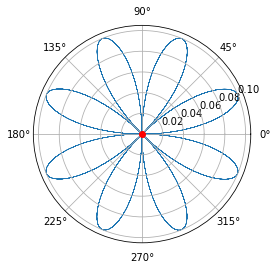

In [29]:
plt.subplot(1,2,1)
_ = polar_plot(a440, 110)

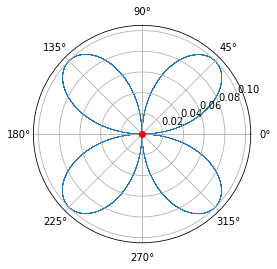

In [30]:
plt.subplot(1,2,1)
_ = polar_plot(a440, 220)

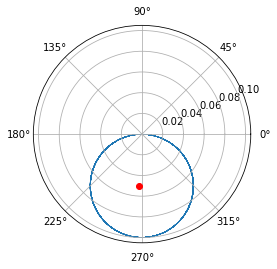

In [31]:
plt.subplot(1,2,1)
_ = polar_plot(a440, 440)

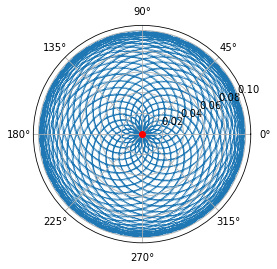

In [32]:
plt.subplot(1,2,1)
_ = polar_plot(a440, 1440)

## Plotting the center of mass for many $f$

The Fourier transformation is the result of plotting the center of mass for a range of rotational rates.  Work through this process using Python/numpy

## A Center of Mass Function Factory

* A function that makes a function

In [33]:
def center(seq, sr = 22050):
    def center_for_seq(f):
        polar = seq*np.exp(-2*np.pi*1j*f*time)
        center = polar.sum()/len(polar)
        return center
    return center_for_seq

a440_center_func = center(a440)
[a440_center_func(f) for f in [110, 220, 440, 1400]]

[(9.464892846877531e-09+6.038600920035522e-07j),
 (4.732504576902669e-08+1.50929789392617e-06j),
 (-0.0031304003935710063-0.04986853594310624j),
 (-1.5752712234686592e-07-7.792236228371819e-07j)]

## Creating Centers for Many Rotational Frequencies

Now we will compute centers for a wide range of frequencies

In [40]:
lower = 0
upper = 3000
num_steps = 3000
fourier = center(a440)
freqs = numpy.linspace(lower, upper, num_steps)
ys = np.array([np.absolute(fourier(freq)) for freq in freqs])

## Plotting the Fourier Transform

The Fourier Transform plots magnitude of the center of mass by frequency.  Note that the graphs that we make are not exactly correct, but are only off by a multipicative constant.

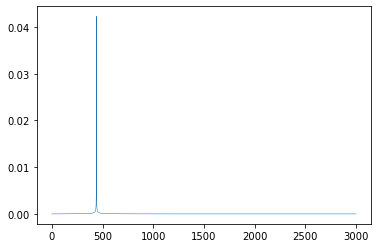

In [42]:
plt.plot(freqs, ys, lw=0.5)

## Putting it all together

Let's make a Fourier plotting function

In [36]:
def make_freqs(lower = 0, upper = 3000, sr = 22050):
    fs = numpy.linspace(lower, upper, num_steps)
    return fs

def fourier_seq(seq, lower = 0, upper = 3000, sr = 22050):
    freqs = make_freqs(lower, upper, sr)
    fourier = center(seq, sr)
    ys = np.array([np.absolute(fourier(freq)) for freq in freqs])
    return ys
    
def plot_fourier(seq, lower = 0, upper = 3000, num_steps = 3000, sr = 22050):
    ys = fourier_seq(seq, lower, upper, sr)
    ax = plt.subplot(111)
    ax.plot(freqs, ys, lw = 0.5)
    return ax

## The Fourier Transform for d291

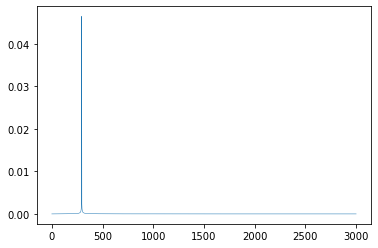

In [37]:
_ = plot_fourier(d294)

## The Fourier Transform for a440 + d294

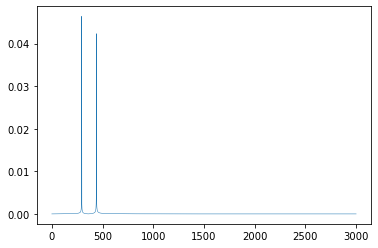

In [38]:
_ = plot_fourier(mix)

## <font color="red"> Exercise 2 </font>

* Make the Fourier transform plot for `mix2`. 
* Use the plot to determine the frequencies of the original tones.

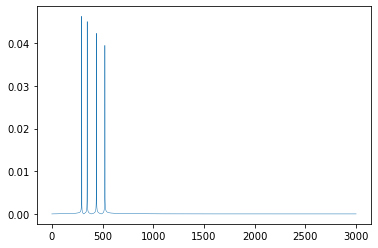

In [43]:
_ = plot_fourier(mix2)

In [ ]:
#Frequencies are at 294, 349, 440, 523

## Linearity of the Fourier Transform

This all works because the transformation is a **linear operator**, meaning

$$fourier(as_1 + bs_2) = a*fourier(s_1) + b*fourier(s_2),$$

which is true for all real numbers $a$ and $b$, as well as all sound sequences $s_1$ and $s_2$.  

## Verifying Linearity

Let's verify the linearity of the Fourier transform by showing it is the same if preformed before or after adding.

In [45]:
add_after = fourier_seq(a440) + fourier_seq(d294)
add_before = fourier_seq(a440 + d294)

In [46]:
different = (add_after - add_before)
different

array([-2.97066478e-19, -2.64697796e-20,  2.20757962e-19, ...,
       -2.56227467e-20, -1.13290657e-20,  9.31736242e-21])

In [47]:
diff_basically_zero = different.round(3) == 0
diff_basically_zero

array([ True,  True,  True, ...,  True,  True,  True])

In [48]:
diff_basically_zero.all()

True

## <font color="red"> Exercise 3 </font>

* Verify linearity for `mix2`. 

In [44]:
ex3_add_after = fourier_seq(a440) + fourier_seq(d294) + fourier_seq(f349) + fourier_seq(c523)
ex3_add_before = fourier_seq(a440 + d294 + f349 + c523)
ex3_difference = (ex3_add_after - ex3_add_before)
ex3_rounded = ex3_difference.round(3) == 0
ex3_rounded.all()

True

## A Better Algorithm

* Our process is informative but slow
* `scipy` implements a faster algorithm
    * Fast Fourier Transformation (`fft`)

## Example - C Strum

Let's load an audio file:

In [ ]:
x, sr = librosa.load('audio/c_strum.wav')

In [ ]:
x.shape, sr

Listen to the audio file:

In [ ]:
ipd.Audio(x, rate=sr)

## Fast Fourier Transformation

To compute a Fourier transform in NumPy or SciPy, use [`np.fft.fft`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html#scipy.fftpack.fft):

In [ ]:
X = np.fft.fft(x)
X

## Dealing with Complex numbers

* Output is complex, i.e. $a + bi$
* We plot the radii, $\sqrt{a^2 + b^2}$
    * Compute with `np.absolute`

In [ ]:
X_mag = numpy.absolute(X)
X_mag

## Creating frequency

* We plot frequency by fft
* First create the range of frequencies

In [ ]:
n = x.size
timestep = 1/sr
f = np.fft.fftfreq(n, d=timestep)

In [ ]:
f[np.logical_and(f >= 0, f < 3000)]

## Plot the spectrum

Note, the default output includes both positive and negative frequencies.

In [ ]:
plt.figure(figsize=(13, 5))
plt.plot(f, X_mag) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

## Plot the positive spectrum

`np.fft.fft` sorts the output, with the positive frequencies in the first half of the output array.  Let's plot just the positive frequencies, which are the values of interest for audio.

In [ ]:
pos_f = f[:n//2]
pos_X_mag = X_mag[:n//2]
plt.figure(figsize=(13, 5))
plt.plot(pos_f, pos_X_mag)
plt.xlabel('Frequency (Hz)')

## Zooming In

Note that `pos_f < 3000` returns a `numpy` Boolean array, which can be used to filter both lists using the `[]` operator.

In [ ]:
plt.figure(figsize=(13, 5))
plt.plot(pos_f[pos_f < 3000], pos_X_mag[pos_f < 3000])
plt.xlabel('Frequency (Hz)')

## Putting it all together

In [ ]:
def fft_plot(seq, lower = 0, upper = 22050, sr = 22050):
    X = np.fft.fft(x)
    X_mag = numpy.absolute(X)
    n = x.size
    timestep = 1/sr
    f = np.fft.fftfreq(n, d=timestep)
    filt = np.logical_and(f >= lower, f < upper)
    fig = plt.figure(figsize=(13, 5))
    plt.xlabel('Frequency (Hz)')
    plt.plot(f[filt], X_mag[filt], lw = 0.5)
    return fig

In [ ]:
_ = fft_plot(x)

In [ ]:
_ = fft_plot(x, lower = 400, upper = 5000)

## Example Animation (Ignore for now)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro', animated=True)

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

In [ ]:
from IPython.display import HTML
HTML(ani.to_html5_video())

[&larr; Back to Index](index.html)